
# EDA - Index Funds and Macro Indicators
___________________________

The goal of my capstone is to predict stock and bond market regimes using machine learning models. The study will use historial stock prices for "SPY" and "VBMFX", various macroeconomic indicators ( e.g. GDP, Inflation) and interest rate bench marks as dependent variables.

Data Collection: The data was constructed by collecting daily stock prices for index funds from yahoo finance and various metrics from the Federal Economic Reserve Data website (FRED). 

Forward-fill was used to fill in missing data. Missing values for macro indicators are due to certain indicators only availabe on a quarterly basis. The data was resampled using month-end values. 

**Raw Data Extracts**:<br>
+ Index Fund Prices: [Link](https://github.com/pymd661/CS668_Capstone/blob/main/df_returns.xlsx)<br>
+ FRED Macro Indicators: [Link](https://github.com/pymd661/CS668_Capstone/blob/main/df_macro.xlsx)<br>

**Cleaned Data**:<br>
+ SPY_VBMFX_Macro: [Link](https://github.com/pymd661/CS668_Capstone/blob/main/df_SPY_VBMFX_Macro_Signals.xlsx)


Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import functions as ff
import numpy as np

Data set

In [2]:
df= pd.read_excel('../df_SPY_VBMFX_Macro_Signals.xlsx',index_col=0,sheet_name='Sheet1')

**Data set description**

The data contains the indexed funds 'SPY' and 'VBFMX'<br>
SPY tracks the performance of the S&P 500 which is the leading 500 companies in the United States stock exchange.

VBFMX tracks the performance of Bloomberg US Aggregate Float Adjusted Index. This index consist of investment grade, US dollar-denominated, fixed-rate taxable bond market. The fund holds investments in US Treasuries, government agencies, corporate bonds, mortgage backed securities, and asset-backed securities.

The data set spans from **April 1993 to September 2025**. This length of **32.5** years gives us ample data to do a stock and bond regime analysis. We have 79 variables to be refined via feature selection.

The data also contains macro indicators such as GPD, Unemployment Rate, Retail Sales, Inflation, Housing Permits, and Industry Production.

It also includes various interest rates and bond yield rates such as 10 Year Treasury, Federal Funds Rate, Corporate Bond Rates.


>**Start Date**: 1993-04-30<br>
>**End Date**: 2025-09-30<br>
>**No. of Features**: 79<br>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 390 entries, 1993-04-30 to 2025-09-30
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SPY                        390 non-null    float64
 1   SPY_mom                    390 non-null    float64
 2   SPY_3m                     390 non-null    float64
 3   SPY_3m_ann                 390 non-null    float64
 4   SPY_3m_sd                  390 non-null    float64
 5   SPY_3m_ann_sd              390 non-null    float64
 6   SPY_ln_3m                  390 non-null    float64
 7   SPY_ann_ln_3m              390 non-null    float64
 8   VBMFX                      390 non-null    float64
 9   VBMFX_mom                  390 non-null    float64
 10  VBMFX_3m                   390 non-null    float64
 11  VBMFX_3m_ann               390 non-null    float64
 12  VBMFX_3m_sd                390 non-null    float64
 13  VBMFX_3m_ann_sd            390 

In [4]:
df.head(3)

,SPY,SPY_mom,SPY_3m,SPY_3m_ann,SPY_3m_sd,SPY_3m_ann_sd,SPY_ln_3m,SPY_ann_ln_3m,VBMFX,VBMFX_mom,...,Slope_10Y_FF_Delta3m,AAA_minus_10Y,AAA_minus_10Y_Delta1m,AAA_minus_10Y_Delta3m,BAA_minus_10Y,BAA_minus_10Y_Delta1m,BAA_minus_10Y_Delta3m,BAA_minus_AAA,BAA_minus_AAA_Delta1m,BAA_minus_AAA_Delta3m
1993-04-30,24.479979,-0.025588,0.006866,0.027747,0.025016,0.050032,-0.025921,0.027369,2.488272,0.007439,...,-0.33,1.36,-0.24,-0.05,2.12,-0.06,0.01,0.76,0.18,0.06
1993-05-31,25.140205,0.026970,0.023106,0.095677,0.029115,0.058229,0.026613,0.091373,2.491764,0.001403,...,0.29,1.30,-0.06,-0.28,2.10,-0.02,-0.10,0.80,0.04,0.18
1993-06-30,25.230877,0.003607,0.004301,0.017316,0.026333,0.052666,0.003600,0.017168,2.536777,0.018065,...,-0.32,1.44,0.14,-0.16,2.16,0.06,-0.02,0.72,-0.08,0.14


In [5]:
df.tail(1)

,SPY,SPY_mom,SPY_3m,SPY_3m_ann,SPY_3m_sd,SPY_3m_ann_sd,SPY_ln_3m,SPY_ann_ln_3m,VBMFX,VBMFX_mom,...,Slope_10Y_FF_Delta3m,AAA_minus_10Y,AAA_minus_10Y_Delta1m,AAA_minus_10Y_Delta3m,BAA_minus_10Y,BAA_minus_10Y_Delta1m,BAA_minus_10Y_Delta3m,BAA_minus_AAA,BAA_minus_AAA_Delta1m,BAA_minus_AAA_Delta3m
2025-09-30,666.179993,0.03562,0.081212,0.366607,0.008091,0.016183,0.035001,0.312331,9.77,0.010419,...,0.16,1.06,-0.13,-0.04,1.67,-0.13,-0.08,0.61,0.0,-0.04


In [6]:
data_shape = pd.DataFrame(
    {
        "n_rows": [df.shape[0]],
        "n_cols": [df.shape[1]],
        "start_date": [df.index.min() if isinstance(df.index, pd.DatetimeIndex) else None],
        "end_date": [df.index.max() if isinstance(df.index, pd.DatetimeIndex) else None],
    }
)
data_shape

,n_rows,n_cols,start_date,end_date
0,390,80,1993-04-30,2025-09-30


## SPY and VBMFX Prices

SPY Price in April 1993: $ 24.48
SPY Price in September 2025: $ 666.18
Percent Change from April 1993 to September 2025:  2600%
--------------------------------------------------------------------------------------------------------------


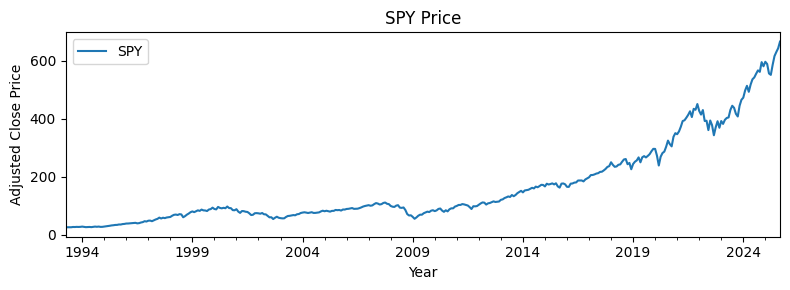

In [7]:
ff.stock_price(stock_name='SPY',single_stock=df['SPY'])
print('--------------------------------------------------------------------------------------------------------------')
df[['SPY']].plot(figsize=(8,3))
plt.title('SPY Price')
plt.xlabel('Year') 
plt.ylabel('Adjusted Close Price')
plt.tight_layout()
plt.show()

VBMFX Price in April 1993: $ 2.49
VBMFX Price in September 2025: $ 9.77
Percent Change from April 1993 to September 2025:  300%
--------------------------------------------------------------------------------------------------------------


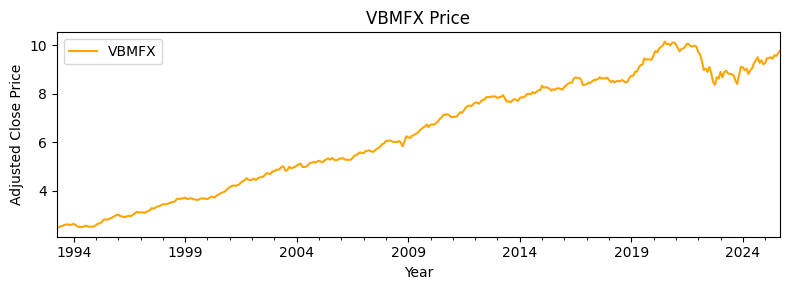

In [8]:
ff.stock_price(stock_name='VBMFX',single_stock=df['VBMFX'])
print('--------------------------------------------------------------------------------------------------------------')

df[['VBMFX']].plot(figsize=(8,3),color="orange")
plt.title('VBMFX Price')
plt.xlabel('Year') 
plt.ylabel('Adjusted Close Price')
plt.tight_layout()
plt.show()



Comparing the 3-month cumulative rolling price return of SPY and VBFMX shows how volatile the price appreciation of SPY compared to VBMFX. This graph also highlights the moments where investing in bonds gives you protection againts the big market downturns.

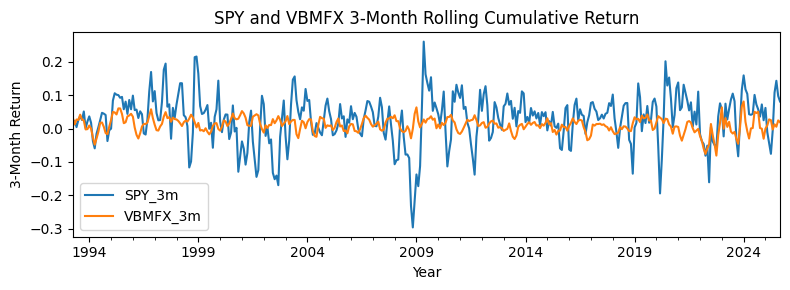

In [9]:
df[['SPY_3m','VBMFX_3m']].plot(figsize=(8,3))
plt.title('SPY and VBMFX 3-Month Rolling Cumulative Return')
plt.xlabel('Year') 
plt.ylabel('3-Month Return')
plt.tight_layout()
plt.show()

In [56]:
df_winner = df[['SPY_3m',"VBMFX_3m"]].idxmax(axis=1).to_frame("Winner") # find the max bet the two columns, get winner
df_winner = df_winner[df_winner['Winner']=='VBMFX_3m'] # filter for VBMFX
index=df_winner.index # get the index
df_bond_win = df[['SPY_3m',"VBMFX_3m"]].loc[index] # return index where VBMFX beats the SPY
df_bond_win.sort_values(by="VBMFX_3m",ascending=False).head(5)

,SPY_3m,VBMFX_3m
2009-01-31,-0.137639,0.063487
2023-01-31,0.057318,0.063479
2001-01-31,-0.038564,0.052290
2001-02-28,-0.060108,0.045349
2008-12-31,-0.215686,0.043833


Graph shows moments from 1993 to 2025 where VBMFX return is greater than SPY.


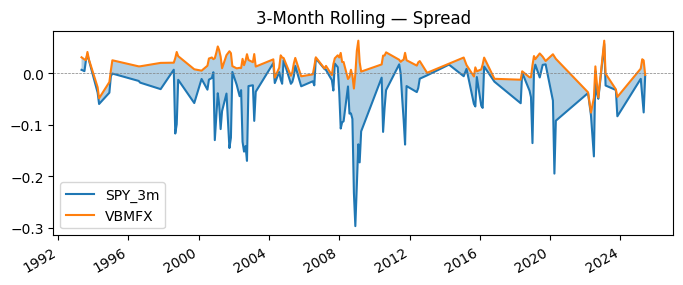

In [59]:
print("Graph shows moments from 1993 to 2025 where VBMFX return is greater than SPY.")
ax = df_bond_win['SPY_3m'].plot(figsize=(8,3),label='SPY_3m') # plot SPY on ax
df_bond_win['VBMFX_3m'].plot(ax=ax,label='VBMFX') # plot VBMFX on same axis
ax.fill_between(x=df_bond_win.index,y1=df_bond_win['SPY_3m'],y2=df_bond_win["VBMFX_3m"],alpha=0.35)
ax.axhline(y=0,linewidth=0.5,linestyle="--",color="gray")
ax.legend()
ax.set_title('3-Month Rolling — Spread')
plt.show()


## Macro Indicators

In [12]:
df[['RealGDP', 'UnemploymentRate', 'Permits', 'CPI', 'CoreCPI', 'IndustrialProd', 'RealRetail']]

,RealGDP,UnemploymentRate,Permits,CPI,CoreCPI,IndustrialProd,RealRetail
1993-04-30,10637.847,7.1,1104.0,143.800,151.400,65.0423,154720.0
1993-05-31,10637.847,7.1,1112.0,144.200,151.800,64.8006,155537.0
1993-06-30,10637.847,7.0,1130.0,144.300,152.100,64.9476,155353.0
1993-07-31,10688.606,6.9,1174.0,144.500,152.300,65.1142,158267.0
1993-08-31,10688.606,6.8,1230.0,144.800,152.800,65.0421,157425.0
...,...,...,...,...,...,...,...
2025-05-31,23770.976,4.2,1394.0,320.580,326.854,103.6570,618037.0
2025-06-30,23770.976,4.1,1393.0,321.500,327.600,104.2115,624146.0
2025-07-31,23770.976,4.2,1362.0,322.132,328.656,103.8194,628620.0
2025-08-31,23770.976,4.3,1330.0,323.364,329.793,103.9203,632490.0


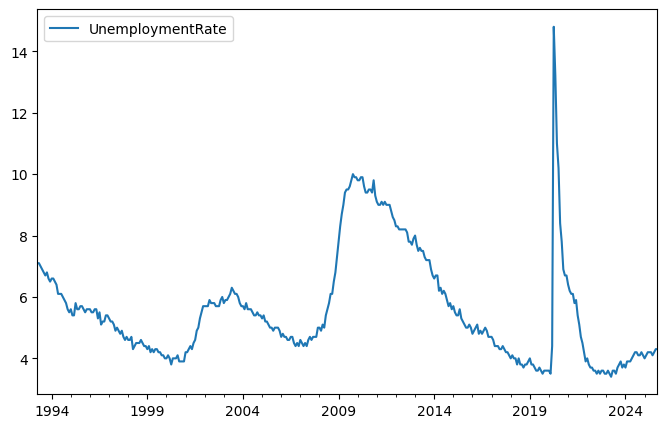

In [13]:
df[['UnemploymentRate']].plot(figsize=(8,5))
plt.show()

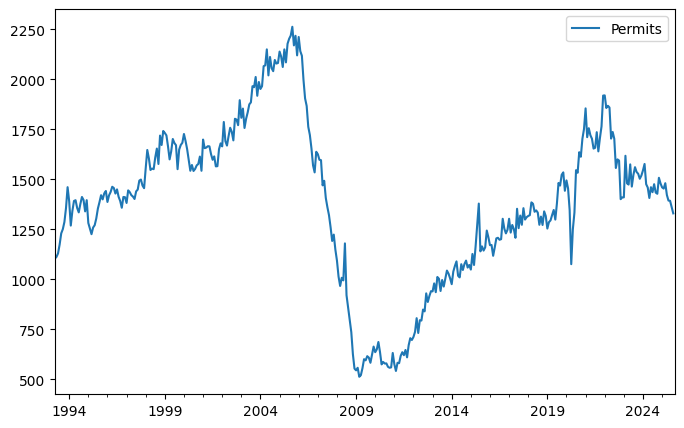

In [14]:
df[['Permits']].plot(figsize=(8,5))
plt.show()

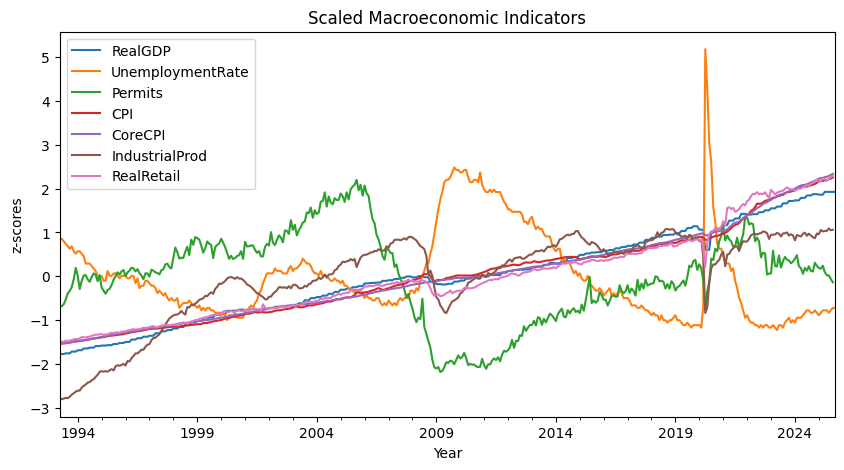

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['RealGDP', 'UnemploymentRate', 'Permits', 'CPI', 'CoreCPI', 'IndustrialProd', 'RealRetail']])
scaled_df = pd.DataFrame(scaled_data, columns=['RealGDP', 'UnemploymentRate', 'Permits', 'CPI', 'CoreCPI', 'IndustrialProd', 'RealRetail'], index=df.index)
scaled_df.plot(figsize=(10, 5), title='Scaled Macroeconomic Indicators',xlabel='Year',ylabel="z-scores")
plt.show()

## Correlation

In [16]:
corr_col = ['SPY_3m','VBMFX_3m','RealGDP', 'UnemploymentRate', 'Permits', 'CPI', 'CoreCPI', 'IndustrialProd', 'RealRetail', 'Mort30Y', 'UST10Y', 'UST2Y', 'UST3M', 'CorpBAA', 'CorpAAA','FedFundsRate']
df[corr_col].corr(method='spearman')[['SPY_3m',"VBMFX_3m"]].sort_values(by='SPY_3m',ascending=True)


,SPY_3m,VBMFX_3m
CorpBAA,-0.156931,0.139840
CorpAAA,-0.106053,0.122958
Mort30Y,-0.065092,0.082593
IndustrialProd,-0.052359,-0.224720
Permits,-0.032128,-0.102224
UST10Y,-0.027091,0.078579
UST2Y,-0.018976,0.058063
FedFundsRate,0.006734,0.190005
UST3M,0.031960,0.153993
VBMFX_3m,0.037340,1.000000


In [17]:
df[corr_col].corr(method='kendall')[['SPY_3m',"VBMFX_3m"]]

,SPY_3m,VBMFX_3m
SPY_3m,1.000000,0.027144
VBMFX_3m,0.027144,1.000000
RealGDP,0.035212,-0.159169
UnemploymentRate,0.050412,0.049025
Permits,-0.019473,-0.069290
CPI,0.033847,-0.159137
CoreCPI,0.034043,-0.154605
IndustrialProd,-0.031723,-0.155434
RealRetail,0.033154,-0.167466
Mort30Y,-0.042145,0.055552
